<a href="https://colab.research.google.com/github/srinath68/NNDL/blob/main/Assignment_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NESTEROV ACCELERATED GRADIENT DESCENT OPTIMISER**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
load_data = pd.read_excel("Load Data in kW.xlsx")
load_data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [ ]:
type(load_data)

pandas.core.frame.DataFrame

In [ ]:
data = load_data.rename(columns={5551.82208:'load'},inplace=False)

In [ ]:
data.head()

,load
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [ ]:
data.shape

(2183, 1)

In [ ]:
data.describe()

,load
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2183 entries, 0 to 2182
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   load    2183 non-null   float64
dtypes: float64(1)
memory usage: 17.2 KB


In [ ]:
data.corr()

,load
load,1.0


# **VALIDATING NULL VALUE**

In [10]:
data.isnull().sum()

load    0
dtype: int64

# **VISUALISING OUTLINERS OF DATA**

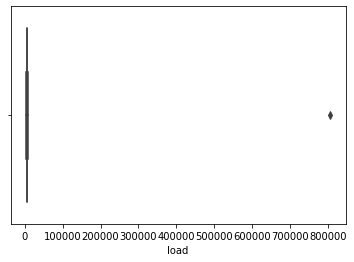

In [11]:
sns.boxplot(x=data['load'])

In [12]:
from scipy import stats

z = np.abs(stats.zscore(load_data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928]),)


**From boxplot and from above zscore calculation, we can conclude that there is one outliner. lets replace it.bold text**

In [13]:
data.iloc[928,0] = data.iloc[927,0]

# **AFTER REPLACING THE OUTLINER**

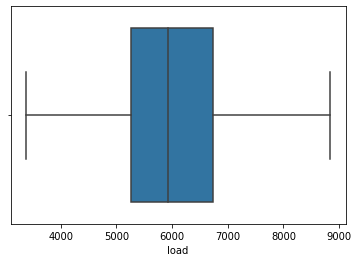

In [14]:
sns.boxplot(x=data['load'])

## **now all outliners are removed and now we are good to train the model**

In [15]:
data_x = []
data_y = []
for i in range(0,len(data)-1):
  data_x.append(data.iloc[i,0])
  data_y.append(data.iloc[i+1,0])

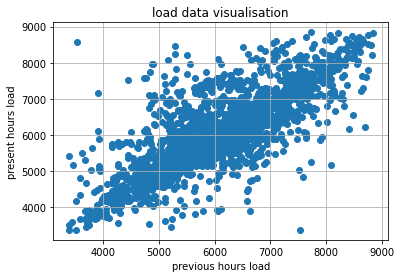

In [16]:
plt.scatter(data_x,data_y)
plt.title("load data visualisation")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()

In [17]:
data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x)
print(min_y)
print(max_x)
print(max_y)

3377.9196
3377.9196
8841.66948
8841.66948


# **DATA NORMALISATION**

In [18]:
x = minmax_scale(data_x)
y = minmax_scale(data_y)

In [19]:
data_norm = []
for i in range(len(data)-24):
  data_norm.append([x[i],y[i]])

data_norm = pd.DataFrame(data_norm)
data_norm

,0,1
0,0.293800,0.276454
1,0.276454,0.310234
2,0.310234,0.332801
3,0.332801,0.414254
4,0.414254,0.690965
...,...,...
2154,0.231719,0.445808
2155,0.445808,0.684146
2156,0.684146,0.514679
2157,0.514679,0.417306


# **SPLITTING DATA SET**

In [20]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(data_norm,test_size=0.1)

In [21]:
data_norm.head()

,0,1
0,0.293800,0.276454
1,0.276454,0.310234
2,0.310234,0.332801
3,0.332801,0.414254
4,0.414254,0.690965


In [22]:
data_x = np.array(data_train[0])

In [23]:
data_y = np.array(data_train[1])

In [24]:
len(data_x)

1943

In [25]:
len(data_test)

216

# **TRAINING THE MODEL**

In [26]:
#STEP 2: initialising required parameters
m = 1
c = -1
iter = 1
epochs = 2000
alpha = 0.1
ns = len(data_train)
error = []
vm = 0
vc = 0
moment = 0.9

In [27]:
# while loop is runned until iter reaches epochs
while (iter<=epochs):
  # running for loop to calculate and update model parameters for each sample
  for i in range(0,len(data_train)):
    # calculating derivatives of m and c
    der_m = (-1) * (data_y[i] - ((m+(moment*vm))*data_x[i]) - (c+(moment*vc)))*(data_x[i])
    der_c = (-1) * (data_y[i] - ((m+(moment*vm))*data_x[i]) - (c+(moment*vc)))
    # print("derivatives at ",i,"   ",der_m,der_c)

    # calculating change in m and c
    vm = (moment * vm) - (alpha * der_m)
    vc = (moment * vc) - (alpha * der_c)
    # print("changes at ",i,vm,vc)

    #updating m and c
    m = m + vm
    c = c + vc
    # print("values at",i,m,c)

  err=0
  for i in range(0,len(data_train)):
    err+=((data_y[i] - (m * data_x[i]) - c))**2
  err = (1/(2*len(data_train))) * err
  error.append(err)
    #incrementing no of iterations
  iter = iter + 1
 

  
print(m,c)

0.8371055741101378 0.2679720064406255


In [28]:
len(error)

2000

In [29]:
iters = np.arange(epochs)

In [30]:
from sklearn.metrics import mean_squared_error

In [31]:
pred = []
for i in range(len(data_train)):
  pred.append(m*data_x[i] + c)

In [32]:
mse_train = mean_squared_error(data_y,pred)

data_test

In [33]:
data_test

,0,1
708,0.566574,0.574306
2016,0.103906,0.308408
2089,0.258966,0.170295
1206,0.336938,0.361331
1722,0.382471,0.597815
...,...,...
1702,0.574306,0.442498
1000,0.705486,0.583721
1955,0.398305,0.312801
828,0.743773,0.675872


In [34]:
pred_test = m*data_test[0] + c
mse_test = mean_squared_error(data_test[1],pred_test)

# **MEAN SQUARED ERRORS**

In [35]:
print("training data mean squared error:",mse_train)
print("Testing data mean squared error:",mse_test)

training data mean squared error: 0.05039959070730541
Testing data mean squared error: 0.05095859667937193


In [36]:
print("model parameter:",m,c)

model parameter: 0.8371055741101378 0.2679720064406255


# **VISUALISING TRAINING DATA**

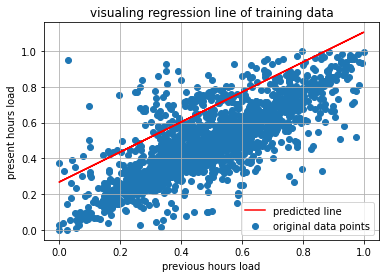

In [37]:
plt.scatter(data_train[0],data_train[1],label="original data points")
plt.plot(data_train[0],pred,color='red',label="predicted line")
plt.title("visualing regression line of training data")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()
plt.legend()

# **VISUALISING TESTING DATA**

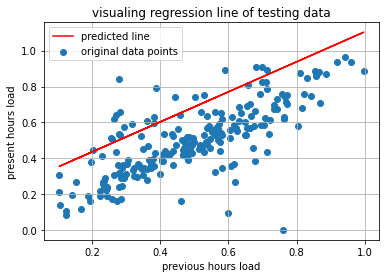

In [38]:
plt.scatter(data_test[0],data_test[1],label="original data points")
plt.plot(data_test[0],pred_test,color='red',label="predicted line")
plt.title("visualing regression line of testing data")
plt.xlabel("previous hours load")
plt.ylabel("present hours load")
plt.grid()
plt.legend()

# **DEPLOYMENT OF MODEL**

In [39]:
input_load = float(input("enter yesterday load at this time : "))
input_load = (input_load - min_x)/(max_x-min_x)
output_load = input_load*m+c

output_load = output_load*(max_y-min_y)+min_y

print("predicted load for this hour is : ",output_load)

enter yesterday load at this time : 4564
predicted load for this hour is :  5834.926132216109
